<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [60]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../Module_2_Data_Wrangling/survey_data.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [61]:
comp_data = df['ConvertedCompYearly'].dropna()
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
comped = comp_data[(comp_data >= lower) & (comp_data <= upper)]
comped

72         7322.0
374       30074.0
379       91295.0
385       53703.0
389      110000.0
           ...   
41179     15600.0
41180     44640.0
41184    170000.0
41185    116844.0
41186     12000.0
Name: ConvertedCompYearly, Length: 22457, dtype: float64

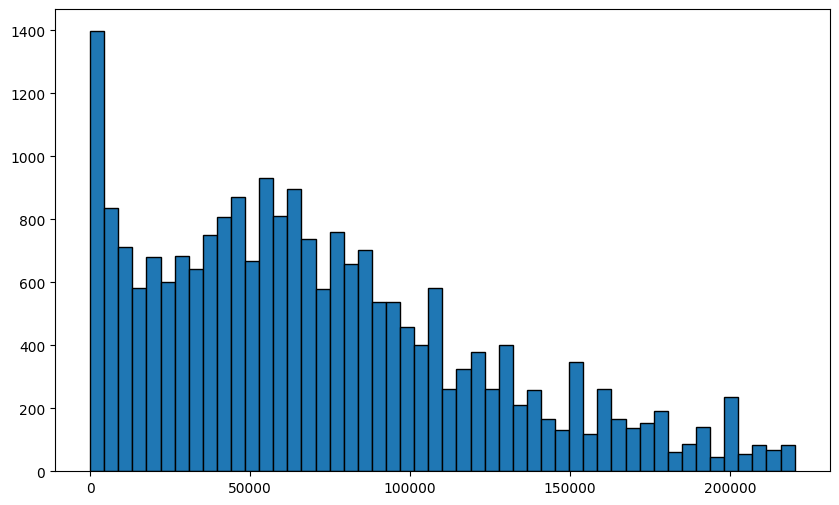

In [62]:
plt.figure(figsize=(10,6))
plt.hist(comped, bins=50, edgecolor='black')
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [63]:
aged = df['Age'].dropna()
def get_age(age):
    if age == '25-34 years old':
        return 30
    elif age == '35-44 years old':
        return 40
    elif age == '18-24 years old':
        return 21
    elif age == '45-54 years old':
        return 50
    elif age == '55-64 years old':
        return 60
    elif age == 'Under 18 years old':
        return 16
    elif age == '65 years or older':
        return 66
    elif age == 'Prefer not to say':
        return 25
aged = aged.apply(get_age)
aged.info()

<class 'pandas.core.series.Series'>
Index: 65437 entries, 0 to 65436
Series name: Age
Non-Null Count  Dtype
--------------  -----
65437 non-null  int64
dtypes: int64(1)
memory usage: 1022.5 KB


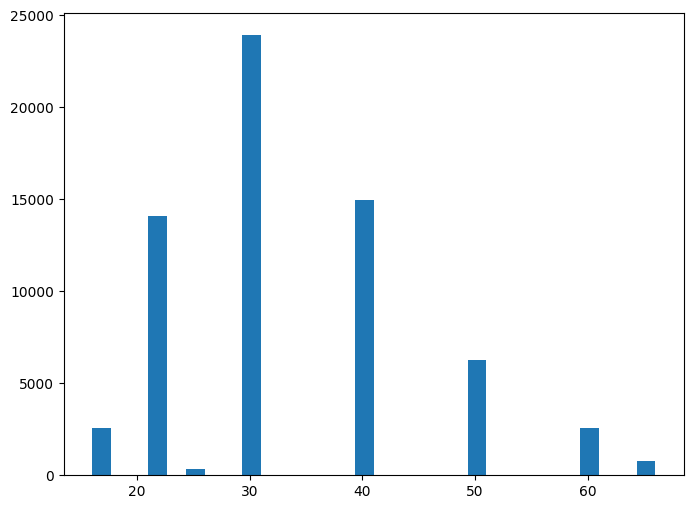

In [64]:
plt.figure(figsize=(8,6))
plt.hist(aged, bins=30)
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



In [65]:
comp = df[['Age', 'ConvertedCompYearly']].dropna()
Q1 = comp['ConvertedCompYearly'].quantile(0.25)
Q3 = comp['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
comp['ConvertedCompYearly'] = comp_data[(comp['ConvertedCompYearly'] >= lower) & (comp['ConvertedCompYearly'] <= upper)]
comp = comp.dropna()
comp

,Age,ConvertedCompYearly
72,18-24 years old,7322.0
374,25-34 years old,30074.0
379,35-44 years old,91295.0
385,35-44 years old,53703.0
389,25-34 years old,110000.0
...,...,...
41179,25-34 years old,15600.0
41180,25-34 years old,44640.0
41184,45-54 years old,170000.0
41185,35-44 years old,116844.0


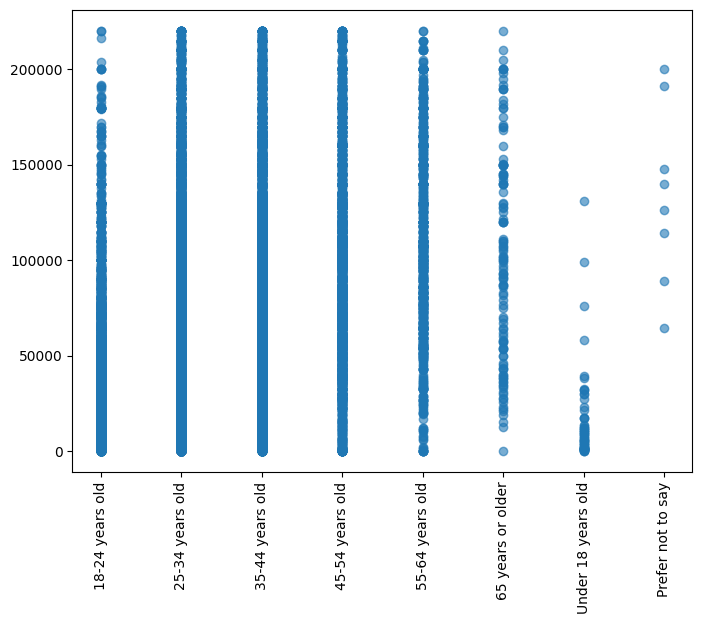

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(comp['Age'], comp['ConvertedCompYearly'], alpha=0.6)
plt.xticks(rotation=90)
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


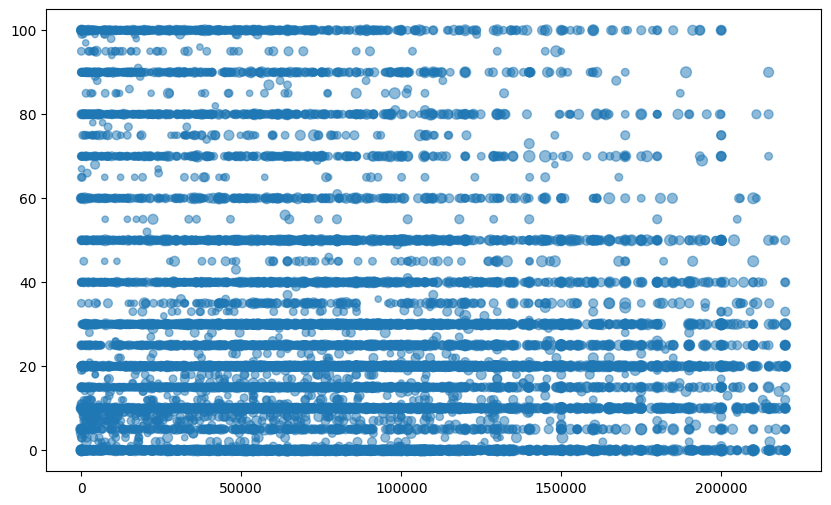

In [67]:
bubble = df[['JobSatPoints_6']].dropna()

bubble = pd.concat([bubble, comped, aged], axis=1)

bubble.columns = ['JobSatPoints_6', 'ConvertedCompYearly', 'Age_numeric']

bubble = bubble.dropna().reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.scatter(
    bubble['ConvertedCompYearly'],
    bubble['JobSatPoints_6'],
    s=bubble['Age_numeric'],
    alpha=0.5
)
plt.show()

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [69]:
df = pd.read_csv('../Module_2_Data_Wrangling/survey_data.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [70]:
bubble_data = df[['Age', 'SOPartFreq', 'JobSat']].dropna()
bubble_data

,Age,SOPartFreq,JobSat
10,35-44 years old,Less than once per month or monthly,8.0
12,35-44 years old,A few times per week,8.0
15,45-54 years old,A few times per month or weekly,5.0
18,25-34 years old,A few times per week,10.0
20,25-34 years old,Less than once per month or monthly,6.0
...,...,...,...
65166,25-34 years old,Less than once per month or monthly,8.0
65178,45-54 years old,A few times per month or weekly,8.0
65241,25-34 years old,Less than once per month or monthly,5.0
65265,18-24 years old,Less than once per month or monthly,8.0


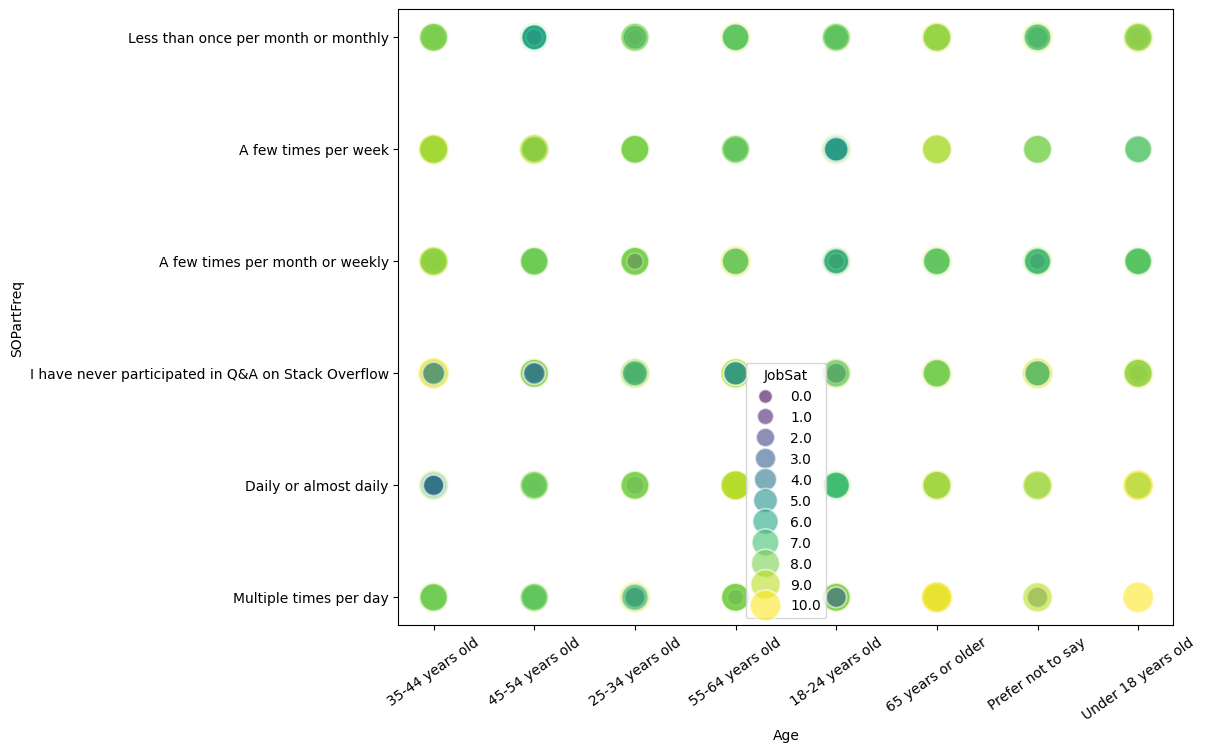

In [71]:
plt.figure(figsize=(10,8))
# plt.scatter(bubble_data['Age'], 
#             bubble_data['SOPartFreq'], 
#             s=bubble_data['JobSat'] * 30, 
#             c=bubble_data['JobSat'], 
#             cmap='viridis')
sns.scatterplot(
    data=bubble_data,
    x='Age',
    y='SOPartFreq',
    size='JobSat',
    hue='JobSat',
    palette='viridis',
    sizes=(100, 500),
    alpha=0.6,
    legend='full'
)
plt.xticks(rotation=35)
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


In [72]:
def get_age(age):
    if age == '25-34 years old':
        return 30
    elif age == '35-44 years old':
        return 40
    elif age == '18-24 years old':
        return 21
    elif age == '45-54 years old':
        return 50
    elif age == '55-64 years old':
        return 60
    elif age == 'Under 18 years old':
        return 16
    elif age == '65 years or older':
        return 66
    elif age == 'Prefer not to say':
        return 25

In [73]:
bubble_data = df[['ConvertedCompYearly', 'JobSat', 'Age']].dropna()
Q1 = bubble_data['ConvertedCompYearly'].quantile(0.25)
Q3 = bubble_data['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
bubble_data = bubble_data[(bubble_data['ConvertedCompYearly'] >= lower) & (bubble_data['ConvertedCompYearly'] <= upper)]

bubble_data['Age'] = bubble_data['Age'].apply(get_age)
bubble_data

,ConvertedCompYearly,JobSat,Age
72,7322.0,10.0,21
379,91295.0,10.0,40
389,110000.0,10.0,30
392,161044.0,7.0,40
398,195000.0,5.0,50
...,...,...,...
41174,9571.0,6.0,21
41175,15637.0,6.0,21
41178,9711.0,0.0,21
41184,170000.0,9.0,50


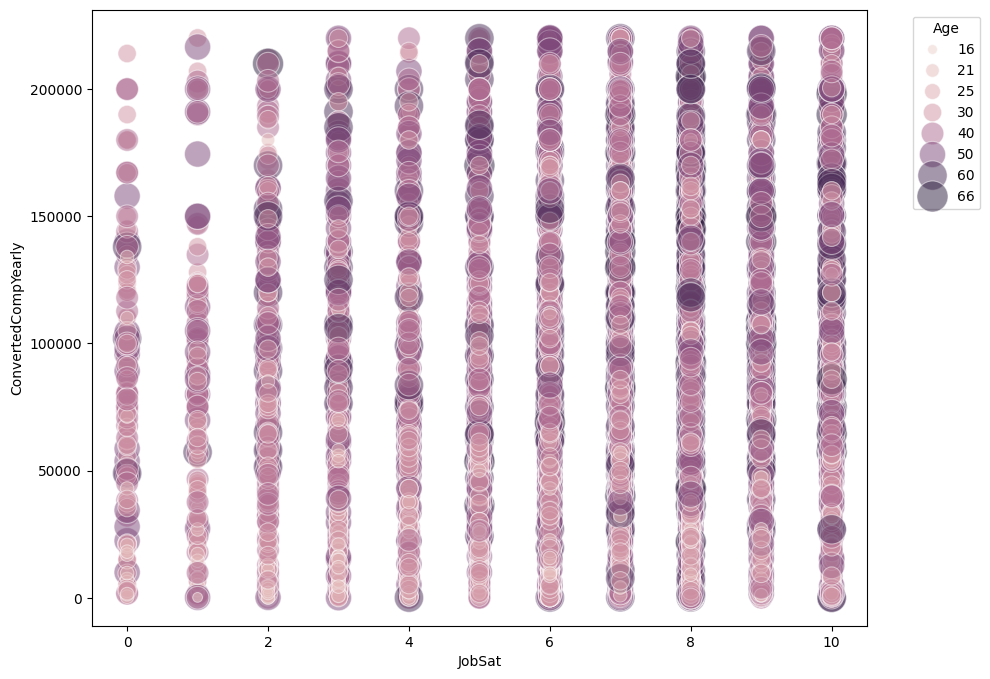

In [74]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=bubble_data, x='JobSat', y='ConvertedCompYearly', size='Age', hue='Age', legend='full', alpha=0.5,sizes=(50,500))
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [75]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [76]:
bubble = df[['LanguageHaveWorkedWith', 'Age']].dropna()
bubble['Age'] = bubble['Age'].apply(get_age)
lang_expanded = bubble.assign(
    Language=bubble['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')
lang_expanded

,LanguageHaveWorkedWith,Age,Language
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,40,Bash/Shell (all shells)
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,40,Go
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,40,HTML/CSS
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,40,Java
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,40,JavaScript
...,...,...,...
65436,C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript,21,Java
65436,C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript,21,JavaScript
65436,C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript,21,PHP
65436,C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript,21,Python


In [77]:
freq_data = lang_expanded.groupby(['Age', 'Language']).size().reset_index(name='Frequency')
freq_data

,Age,Language,Frequency
0,16,Ada,25
1,16,Apex,7
2,16,Assembly,242
3,16,Bash/Shell (all shells),746
4,16,C,746
...,...,...,...
387,66,TypeScript,63
388,66,VBA,96
389,66,Visual Basic (.Net),63
390,66,Zephyr,3


In [78]:
Q1 = freq_data['Frequency'].quantile(0.25)
Q3 = freq_data['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
freq_data = freq_data[(freq_data['Frequency'] >= lower) & (freq_data['Frequency'] <= upper)]
freq_data

,Age,Language,Frequency
0,16,Ada,25
1,16,Apex,7
2,16,Assembly,242
3,16,Bash/Shell (all shells),746
4,16,C,746
...,...,...,...
387,66,TypeScript,63
388,66,VBA,96
389,66,Visual Basic (.Net),63
390,66,Zephyr,3


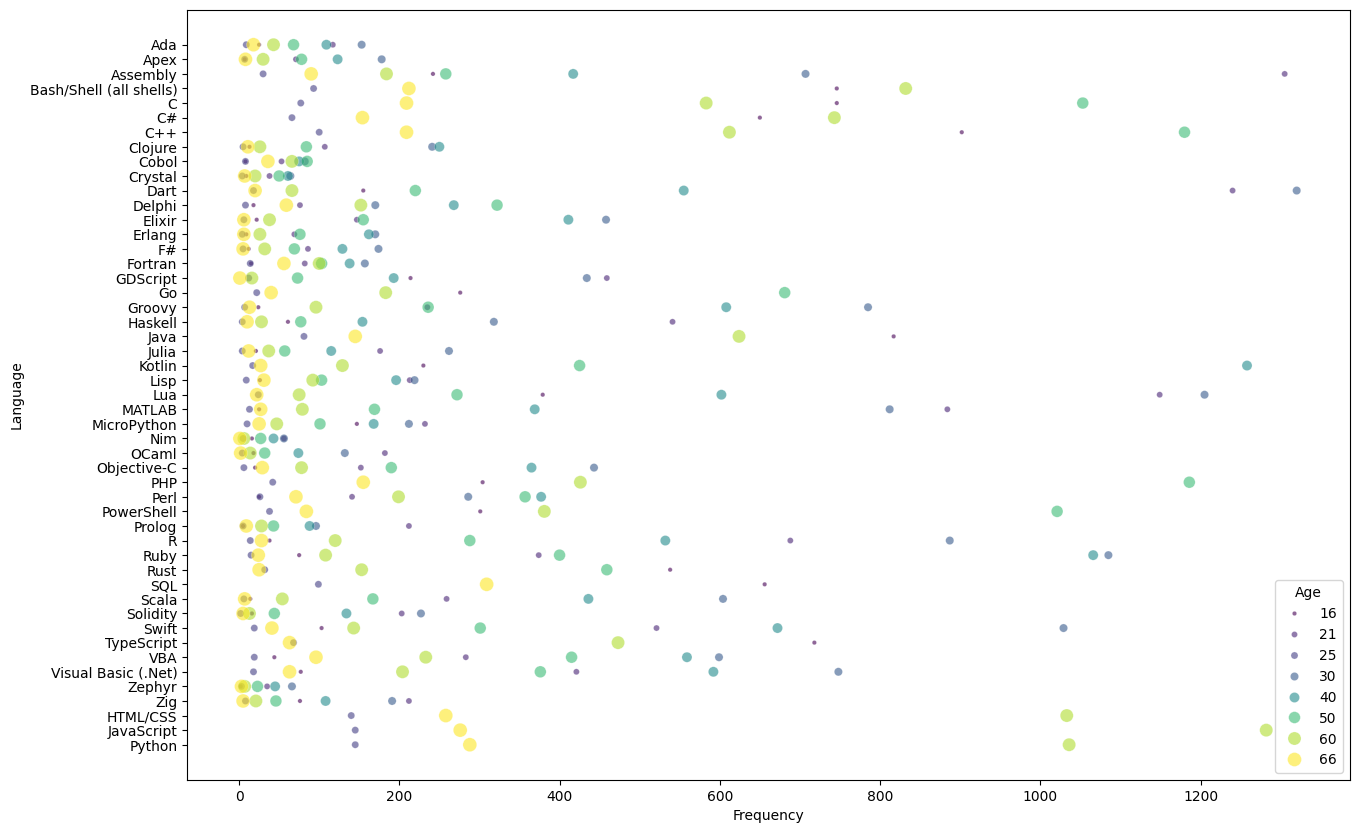

In [79]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=freq_data,
    x='Frequency',
    y='Language',
    size='Age',
    hue='Age',
    palette='viridis',
    sizes=(10, 100),
    alpha=0.6,
    legend='full'
)
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [80]:
db_data = df[['JobSat', 'DatabaseWantToWorkWith']].dropna()
db_expanded = db_data.assign(Database=db_data['DatabaseWantToWorkWith'].str.split(';').explode('Database'))
freq_db = db_expanded.groupby(['JobSat', 'Database']).size().reset_index(name='Frequency')

Q1 = freq_db['Frequency'].quantile(0.25)
Q3 = freq_db['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
freq_db_clean = freq_db[(freq_db['Frequency'] >= lower_bound) & (freq_db['Frequency'] <= upper_bound)]
freq_db_clean

,JobSat,Database,Frequency
0,0.0,BigQuery,2
1,0.0,Cassandra,5
2,0.0,Clickhouse,3
3,0.0,Cloud Firestore,2
4,0.0,Cockroachdb,2
...,...,...,...
358,10.0,Presto,3
359,10.0,RavenDB,2
362,10.0,Snowflake,25
363,10.0,Solr,8


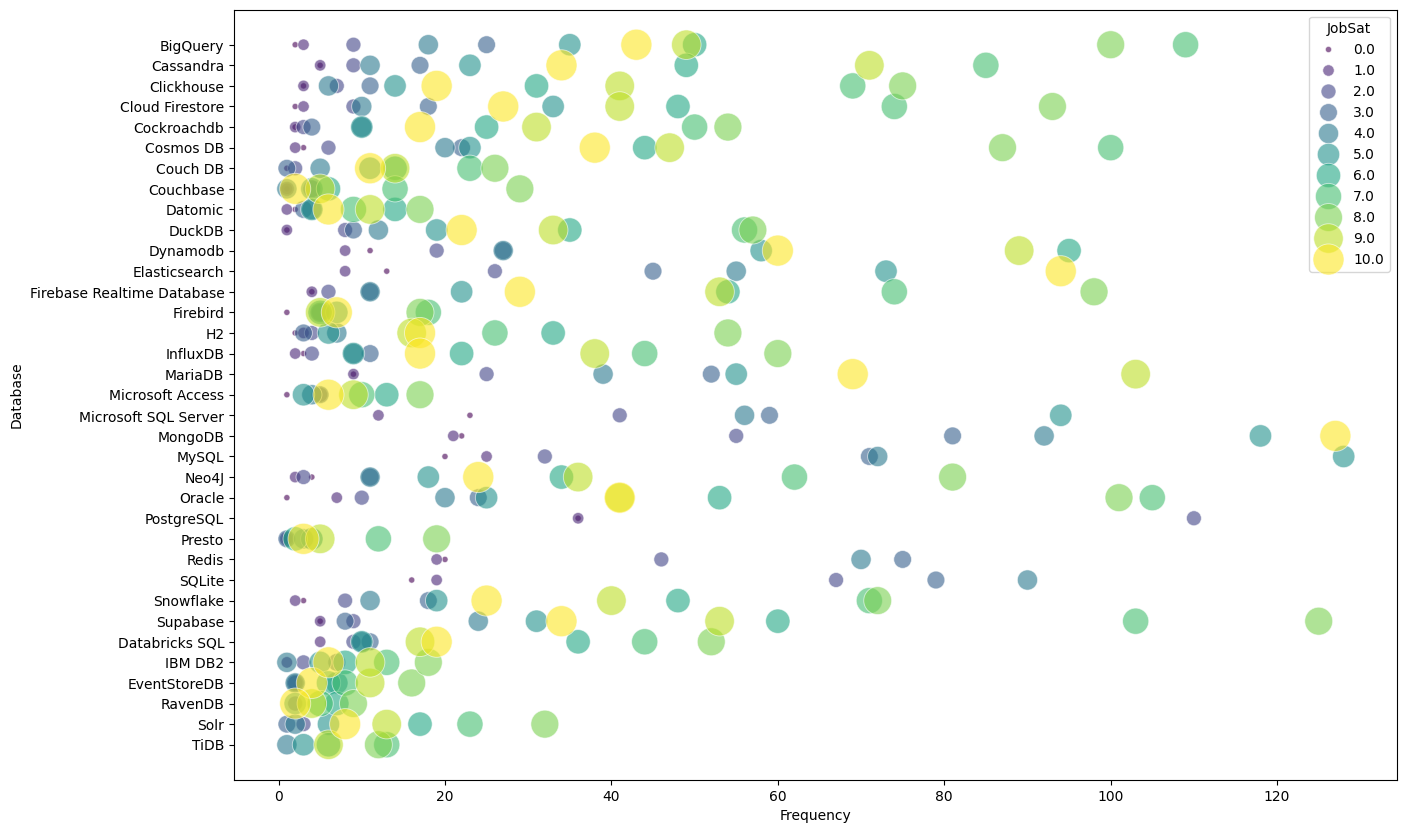

In [81]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=freq_db_clean,
    x='Frequency',
    y='Database',
    size='JobSat',
    hue='JobSat',
    palette='viridis',
    sizes=(20, 500),
    alpha=0.6,
    legend='full'
)
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [82]:
dev_data = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna()
dev_expanded = dev_data.assign(
    DevRole=dev_data['DevType'].str.split(';')
).explode('DevRole')

Q1 = dev_expanded['ConvertedCompYearly'].quantile(0.25)
Q3 = dev_expanded['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dev_clean = dev_expanded[(dev_expanded['ConvertedCompYearly'] >= lower_bound) &
                         (dev_expanded['ConvertedCompYearly'] <= upper_bound)]

dev_clean

,DevType,ConvertedCompYearly,JobSat,DevRole
72,Data scientist or machine learning specialist,7322.0,10.0,Data scientist or machine learning specialist
379,Data scientist or machine learning specialist,91295.0,10.0,Data scientist or machine learning specialist
389,Student,110000.0,10.0,Student
392,Engineering manager,161044.0,7.0,Engineering manager
398,"Developer, full-stack",195000.0,5.0,"Developer, full-stack"
...,...,...,...,...
41174,"Developer, full-stack",9571.0,6.0,"Developer, full-stack"
41175,"Developer, full-stack",15637.0,6.0,"Developer, full-stack"
41178,"Developer, full-stack",9711.0,0.0,"Developer, full-stack"
41184,Project manager,170000.0,9.0,Project manager


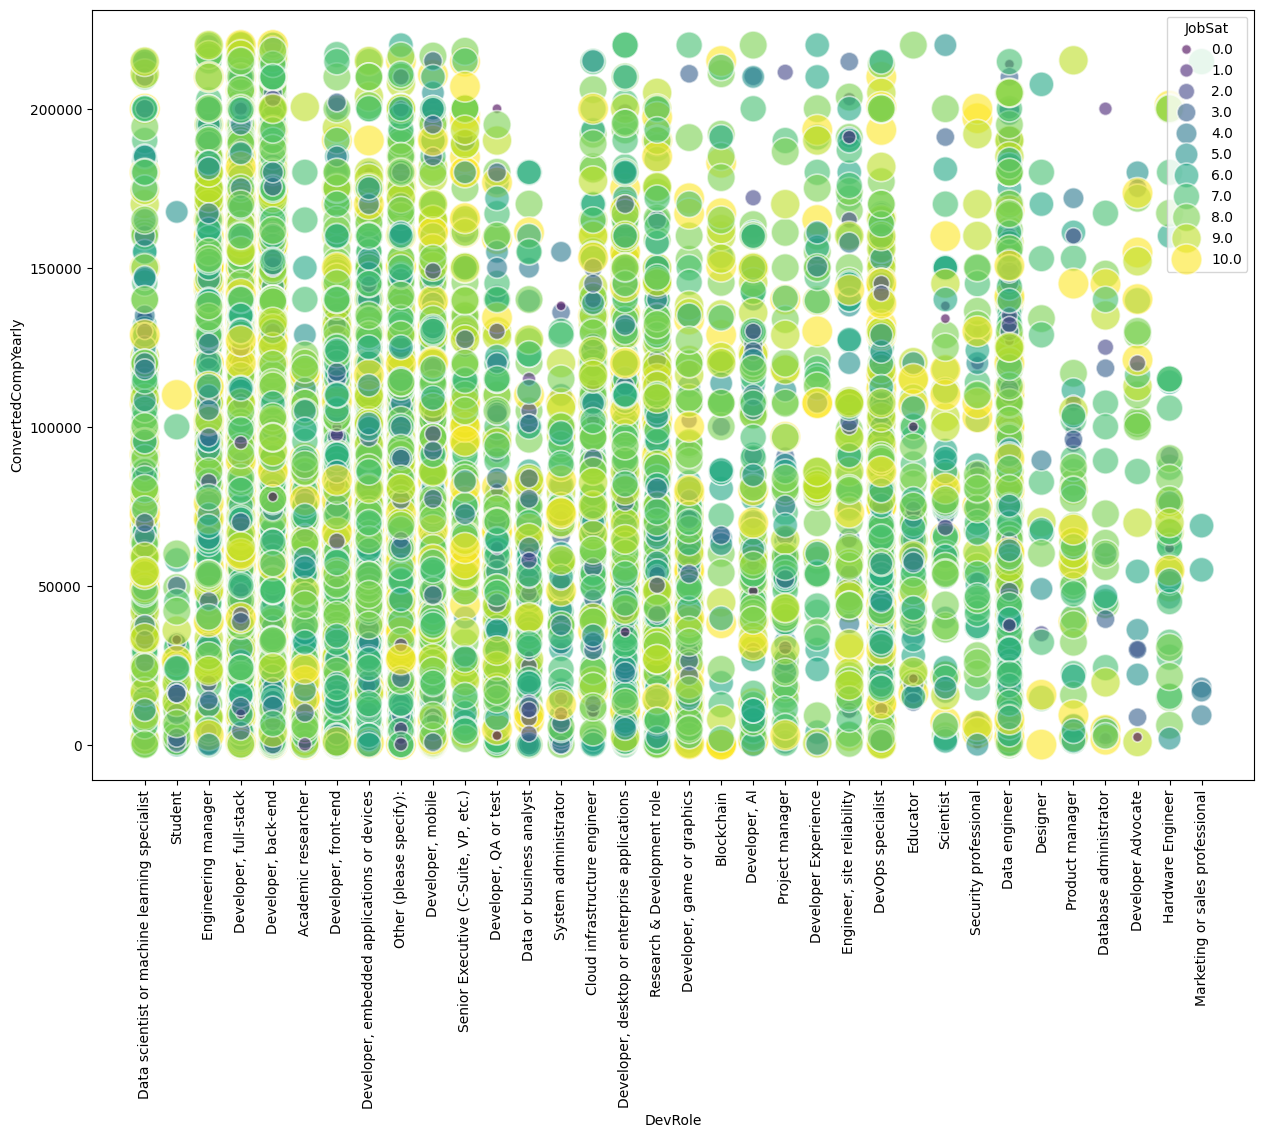

In [83]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=dev_clean,
    x='DevRole',
    y='ConvertedCompYearly',
    size='JobSat',
    hue='JobSat',
    palette='viridis',
    sizes=(50, 500),
    alpha=0.6,
    legend='full'
)
plt.xticks(rotation=90)
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [84]:
tools_data = df[['Age', 'NEWCollabToolsHaveWorkedWith']].dropna()
tools_data['Age'] = tools_data['Age'].apply(get_age)

tools_expanded = tools_data.assign(Tool=tools_data['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('Tool')
freq_tools = tools_expanded.groupby(['Age', 'Tool']).size().reset_index(name='Frequency')
freq_tools

,Age,Tool,Frequency
0,16,Android Studio,479
1,16,BBEdit,5
2,16,CLion,169
3,16,Code::Blocks,126
4,16,DataGrip,47
...,...,...,...
274,66,Vim,116
275,66,Visual Studio,221
276,66,Visual Studio Code,279
277,66,WebStorm,19


In [85]:
Q1 = freq_tools['Frequency'].quantile(0.25)
Q3 = freq_tools['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
freq_tools_clean = freq_tools[(freq_tools['Frequency'] >= lower_bound) & (freq_tools['Frequency'] <= upper_bound)]
freq_tools_clean

,Age,Tool,Frequency
0,16,Android Studio,479
1,16,BBEdit,5
2,16,CLion,169
3,16,Code::Blocks,126
4,16,DataGrip,47
...,...,...,...
274,66,Vim,116
275,66,Visual Studio,221
276,66,Visual Studio Code,279
277,66,WebStorm,19


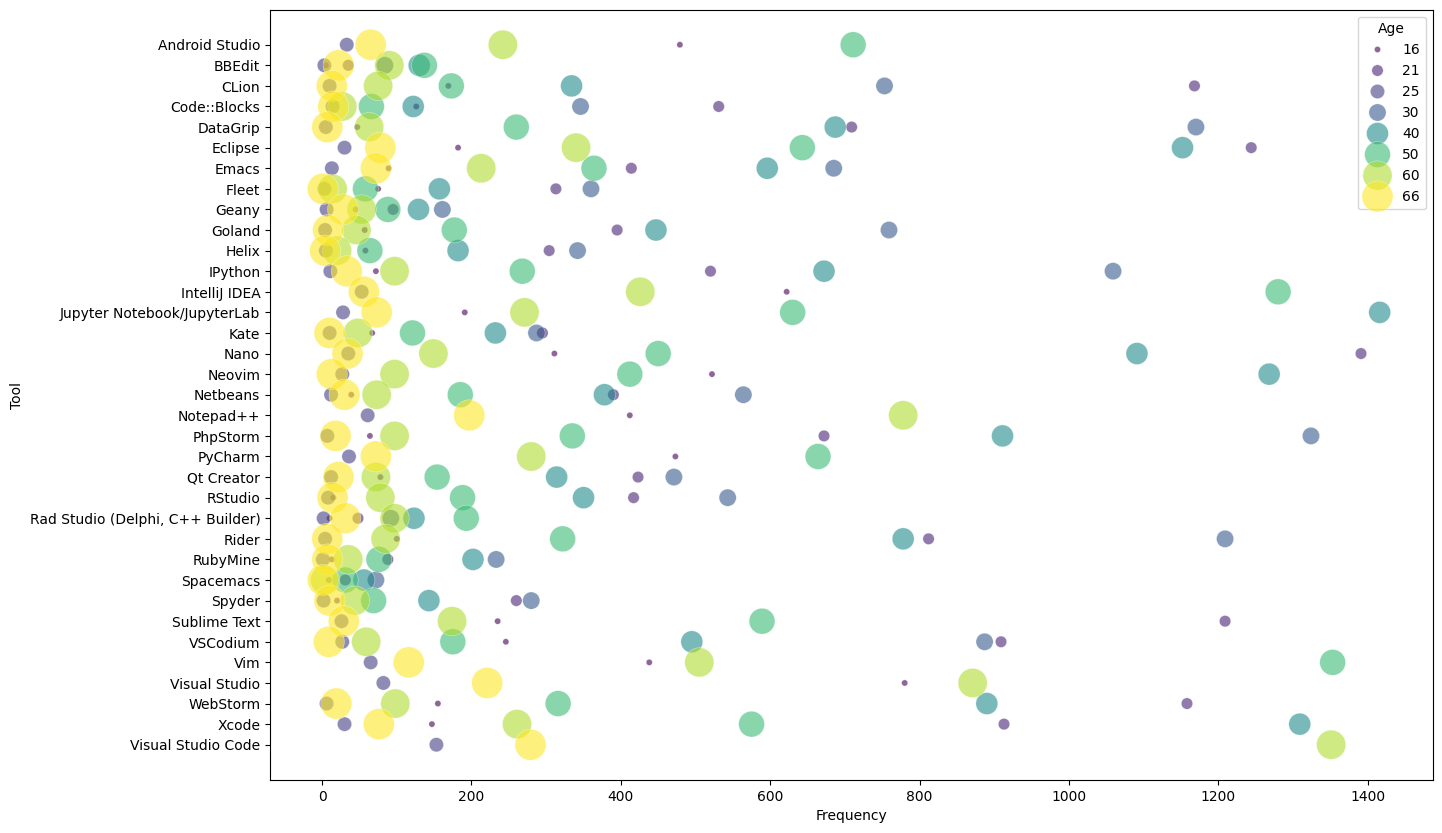

In [86]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=freq_tools_clean,
    x='Frequency',
    y='Tool',
    size='Age',
    hue='Age',
    palette='viridis',
    sizes=(20, 500),
    alpha=0.6,
    legend='full'
)
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [87]:
web_data = df[['JobSat', 'WebframeWantToWorkWith']].dropna()
web_expanded = web_data.assign(WebFramework=web_data['WebframeWantToWorkWith'].str.split(';')).explode('WebFramework')
freq_web = web_expanded.groupby(['JobSat', 'WebFramework']).size().reset_index(name='Frequency')
Q1 = freq_web['Frequency'].quantile(0.25)
Q3 = freq_web['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
freq_web_clean = freq_web[(freq_web['Frequency'] >= lower_bound) & (freq_web['Frequency'] <= upper_bound)]
freq_web_clean

,JobSat,WebFramework,Frequency
0,0.0,ASP.NET,20
1,0.0,ASP.NET CORE,39
2,0.0,Angular,25
3,0.0,AngularJS,7
4,0.0,Astro,13
...,...,...,...
391,10.0,Symfony,63
392,10.0,Vue.js,305
393,10.0,WordPress,118
394,10.0,Yii 2,18


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [88]:
admired_data = df[['Country', 'LanguageAdmired']].dropna()
admired_expanded = admired_data.assign(Technology=admired_data['LanguageAdmired'].str.split(';')).explode('Technology')

freq_admired = admired_expanded.groupby(['Country', 'Technology']).size().reset_index(name='Frequency')

Q1 = freq_admired['Frequency'].quantile(0.25)
Q3 = freq_admired['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 3 * IQR
upper = Q3 + 3 * IQR

freq_admired_clean = freq_admired[(freq_admired['Frequency'] >= lower) & (freq_admired['Frequency'] <= upper)]
freq_admired_clean

,Country,Technology,Frequency
0,Afghanistan,Ada,7
1,Afghanistan,Apex,3
2,Afghanistan,Assembly,5
3,Afghanistan,Bash/Shell (all shells),10
4,Afghanistan,C,6
...,...,...,...
4582,Zimbabwe,PowerShell,5
4583,Zimbabwe,Python,11
4584,Zimbabwe,Rust,2
4585,Zimbabwe,SQL,11


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



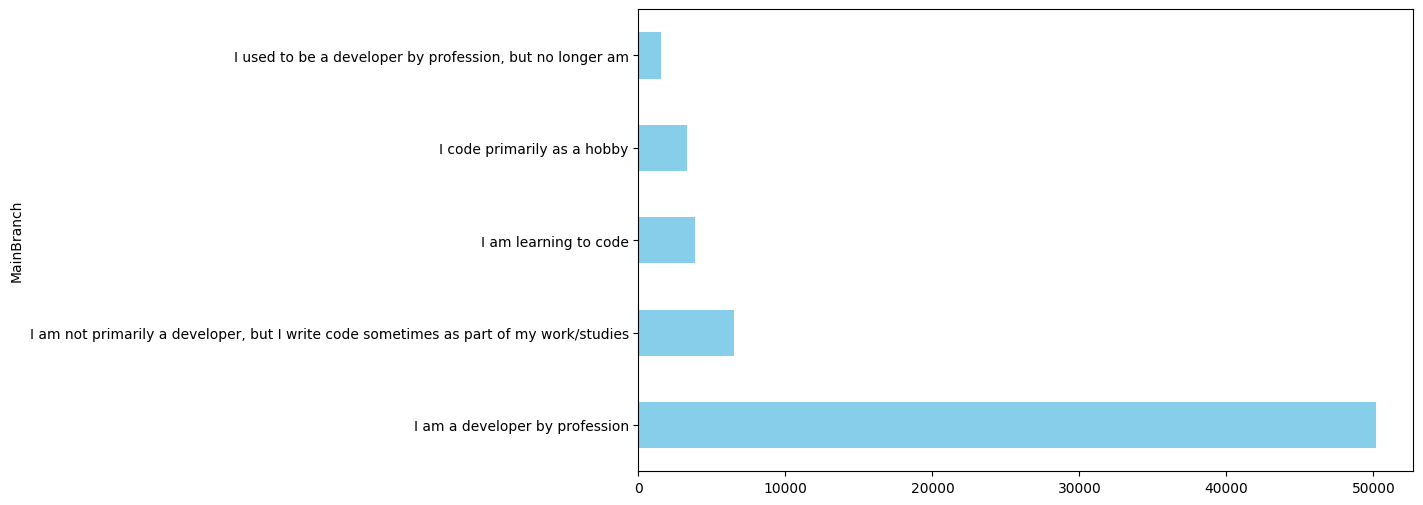

In [ ]:
branch_counts = df['MainBranch'].value_counts().head(10)
plt.figure(figsize=(10,6))
branch_counts.plot(kind='barh', color='skyblue')
# plt.gca().invert_yaxis()  # eng kattasini tepada ko‘rsatadi
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



In [136]:
df['LanguageWantToWorkWith'].dropna()


1        Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                       C#
3        HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...
4                       C++;HTML/CSS;JavaScript;Lua;Python
5        Bash/Shell (all shells);HTML/CSS;Java;JavaScri...
                               ...                        
65421                                                 Rust
65427        Bash/Shell (all shells);C;C++;Python;Ruby;SQL
65431    Bash/Shell (all shells);C#;Go;HTML/CSS;Java;Ja...
65435                                             Rust;SQL
65436                         JavaScript;Python;TypeScript
Name: LanguageWantToWorkWith, Length: 55752, dtype: object

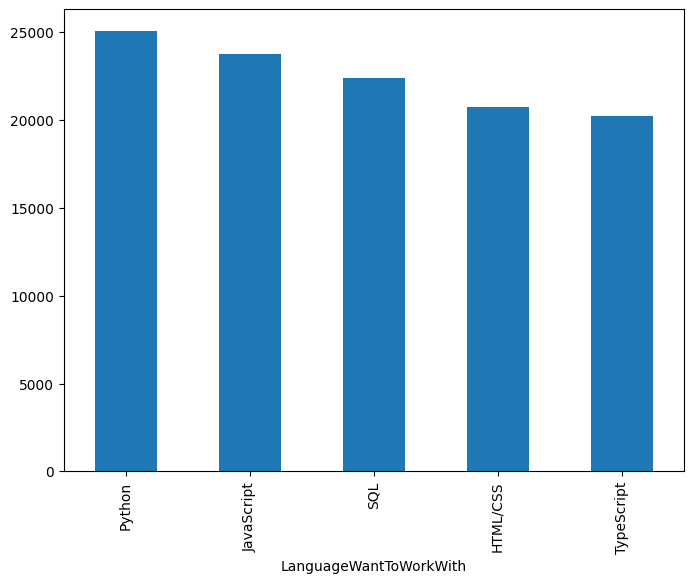

In [99]:
lang = df['LanguageWantToWorkWith'].dropna()
lang = lang.str.split(';').explode()
top5 = lang.value_counts().head()
plt.figure(figsize=(8,6))
top5.plot(kind='bar')
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


In [109]:
age_sat = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series >= lower) & (series <= upper)]

age_sat['JobSatPoints_6'] = remove_outliers(age_sat['JobSatPoints_6'])
age_sat['JobSatPoints_7'] = remove_outliers(age_sat['JobSatPoints_7'])
age_sat = age_sat.dropna()
age_order = ["Under 18 years old", "18-24 years old", "25-34 years old",
    "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older",'Prefer not to say']
age_sat['Age'] = pd.Categorical(age_sat['Age'], categories=age_order, ordered=True)

median_age = age_sat.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()
median_age

,JobSatPoints_6,JobSatPoints_7
Age,,
Under 18 years old,0.0,0.0
18-24 years old,10.0,10.0
25-34 years old,15.0,10.0
35-44 years old,15.0,10.0
45-54 years old,15.0,10.0
55-64 years old,20.0,15.0
65 years or older,20.0,15.0
Prefer not to say,9.5,6.0


<Figure size 800x600 with 0 Axes>

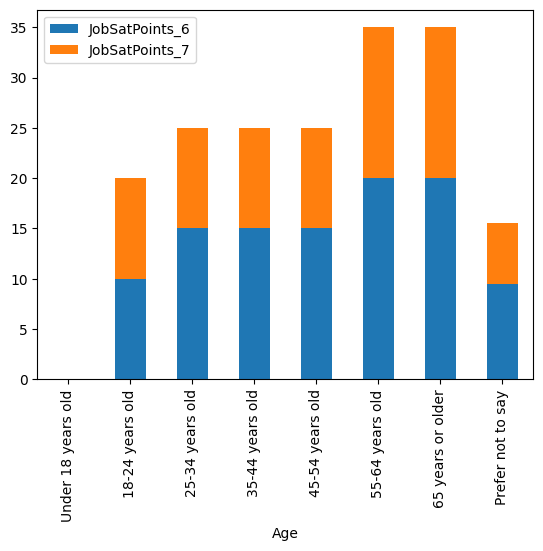

In [ ]:
plt.figure(figsize=(8,6))
median_age.plot(kind='bar', stacked=True)
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



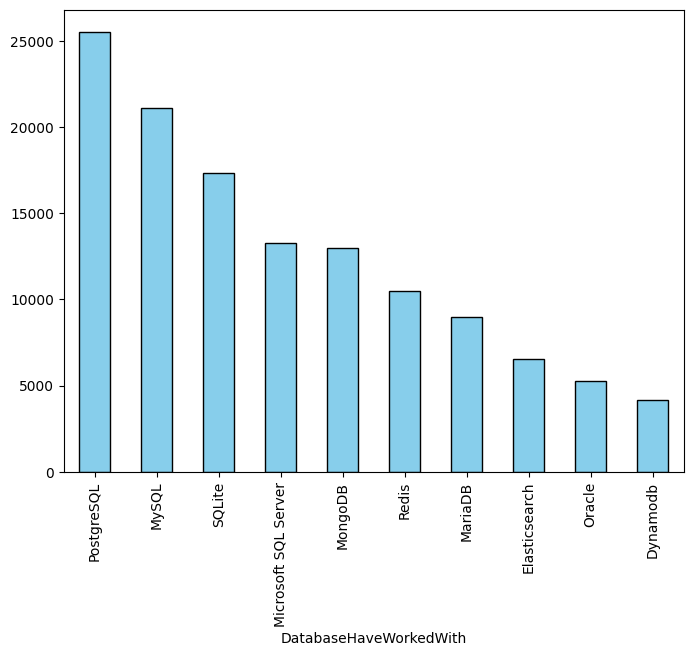

In [115]:
bar = df['DatabaseHaveWorkedWith'].dropna()
bar = bar.str.split(';').explode()
top10 = bar.value_counts().head(10)
plt.figure(figsize=(8,6))
top10.plot(kind='bar', color='skyblue', edgecolor='black')
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



In [117]:
comp_age = df[['Age', 'ConvertedCompYearly']].dropna()
Q1 = comp_age['ConvertedCompYearly'].quantile(0.25)
Q3 = comp_age['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
comp_age = comp_age[(comp_age['ConvertedCompYearly'] >= lower) & (comp_age['ConvertedCompYearly'] <= upper)]
comp_age

,Age,ConvertedCompYearly
72,18-24 years old,7322.0
374,25-34 years old,30074.0
379,35-44 years old,91295.0
385,35-44 years old,53703.0
389,25-34 years old,110000.0
...,...,...
41179,25-34 years old,15600.0
41180,25-34 years old,44640.0
41184,45-54 years old,170000.0
41185,35-44 years old,116844.0


In [118]:
age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old",
    "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older", 'Prefer not to say']
comp_age['Age'] = pd.Categorical(comp_age['Age'], categories=age_order, ordered=True)

median_comp = comp_age.groupby('Age')['ConvertedCompYearly'].median().reset_index()
median_comp

,Age,ConvertedCompYearly
0,Under 18 years old,7253.0
1,18-24 years old,24707.0
2,25-34 years old,58000.0
3,35-44 years old,80000.0
4,45-54 years old,91295.0
5,55-64 years old,105000.0
6,65 years or older,100000.0
7,Prefer not to say,133023.5


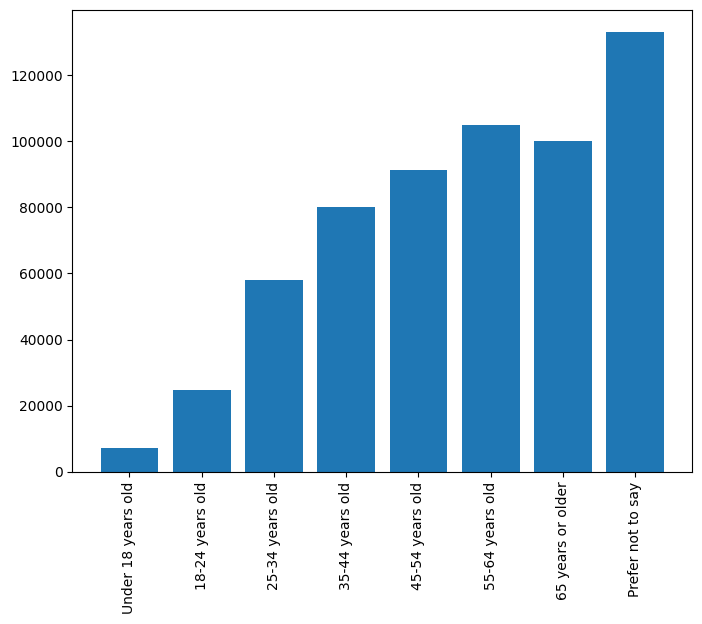

In [122]:
plt.figure(figsize=(8,6))
plt.bar(median_comp['Age'], median_comp['ConvertedCompYearly'])
plt.xticks(rotation=90)
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [125]:
most

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Name: count, dtype: int64

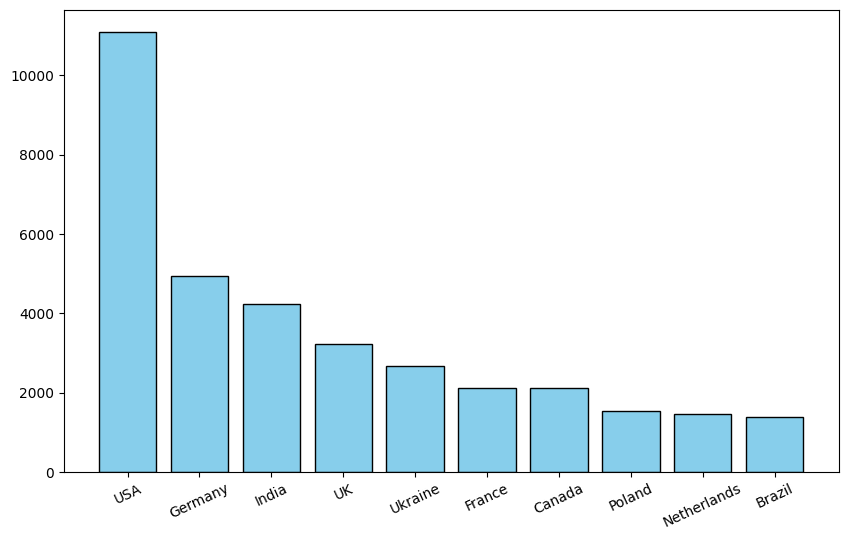

In [135]:
cont = df['Country'].dropna().replace(
    {'United States of America': 'USA', 
     'United Kingdom of Great Britain and Northern Ireland': 'UK'})
most = cont.value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(most.index,  most.values, color="skyblue", edgecolor="black")
plt.xticks(rotation=25)
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
